# Differentiation

Sorry, I did the problem set before it was updated. So some of the later questions are different.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize as opt
import math
import pandas as pd
import scipy
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')
from scipy import stats
import sympy as sy

### Problem 1

In [11]:
def p_1():
    x = sy.symbols('x')
    result = sy.diff((sy.sin(x)+1)**sy.sin(sy.cos(x)), x)
    return result

In [5]:
x = sy.symbols('x') #check function works
sy.diff((sy.sin(x)+1)**sy.sin(sy.cos(x)), x)

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

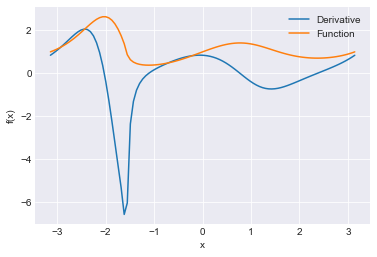

In [17]:
dom = np.linspace(-np.pi, np.pi, 100)  #set the domain
p_1_lambda = sy.lambdify(x, p_1(), "numpy") #'lambdify' the function so that it returns a numpy array
y_1 = p_1_lambda(dom) #create output

plt.plot(dom, y_1, label='Derivative')
plt.plot(dom, (np.sin(dom)+1)**np.sin(np.cos(dom)), label='Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Problem 2

In [33]:
def diff_f_1(f, x, h):
    output = (f(x+h) - f(x))/h
    return output

def diff_f_2(f, x, h):
    output = (-3*f(x) + 4*f(x+h) - f(x+2*h))/(2*h)
    return output

def diff_b_1(f, x, h):
    output = (f(x) - f(x-h))/h
    return output

def diff_b_2(f, x, h):
    output = (3*f(x) - 4*f(x-h) + f(x-2*h))/(2*h)
    return output

def diff_c_2(f, x, h):
    output = (f(x+h) - f(x-h))/(2*h)
    return output

def diff_c_4(f, x, h):
    output = (f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h))/(12*h)
    return output

In [20]:
def f_2(x): #define function
    output = (np.sin(x)+1)**(np.sin(np.cos(x)))
    return output

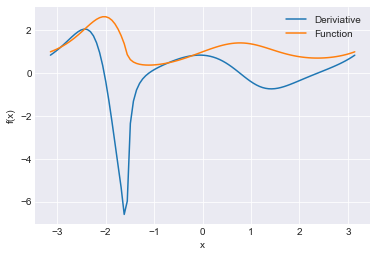

In [21]:
plt.plot(dom, diff_f_1(f_2, dom, 1e-3), label='Deriviative')
plt.plot(dom, (np.sin(dom)+1)**np.sin(np.cos(dom)), label='Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Problem 3

In [34]:
def p_3(x_0):
    domh = np.logspace(-8, 0, 9) #create log domain of h
    
    trueval = p_1_lambda(x_0) #true value  of derivative
    
    plt.plot(domh, np.abs(trueval - diff_f_1(f_2, x_0, domh)), label='Order 1 forward')
    plt.plot(domh, np.abs(trueval - diff_f_2(f_2, x_0, domh)), label='Order 2 forward')
    plt.plot(domh, np.abs(trueval - diff_b_1(f_2, x_0, domh)), label='Order 1 backward')
    plt.plot(domh, np.abs(trueval - diff_b_2(f_2, x_0, domh)), label='Order 2 backward')
    plt.plot(domh, np.abs(trueval - diff_c_2(f_2, x_0, domh)), label='Order 2 centred')
    plt.plot(domh, np.abs(trueval - diff_c_4(f_2, x_0, domh)), label='Order 4 centred')
    
    
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('h')
    plt.ylabel('Absolute error')
    plt.show()
    return

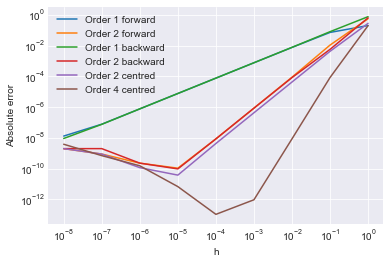

In [35]:
p_3(1.0)

### Problem 4

In [37]:
plane = np.load('plane.npy')

In [40]:
plane

array([[ 7.  , 56.25, 67.54],
       [ 8.  , 55.53, 66.57],
       [ 9.  , 54.8 , 65.59],
       [10.  , 54.06, 64.59],
       [11.  , 53.34, 63.62],
       [12.  , 52.69, 62.74],
       [13.  , 51.94, 61.72],
       [14.  , 51.28, 60.82]])

In [47]:
mask = np.zeros_like(plane) #Create mask
mask[:, 1:3] = True
mask

array([[0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.]])

In [49]:
plane_rad = np.deg2rad(plane, out=plane_rad, where = (mask==True)) #convert to radians

In [50]:
plane_rad

array([[ 7.        ,  0.9817477 ,  1.17879538],
       [ 8.        ,  0.96918133,  1.16186568],
       [ 9.        ,  0.95644043,  1.14476146],
       [10.        ,  0.94352499,  1.12730816],
       [11.        ,  0.93095862,  1.11037847],
       [12.        ,  0.91961398,  1.09501957],
       [13.        ,  0.90652401,  1.07721721],
       [14.        ,  0.89500484,  1.06150925]])

In [57]:
al = plane_rad[:, 1] #alpha
be = plane_rad[:, 2] #beta
tan_al = np.tan(plane_rad[:, 1]).T #tan alpha
tan_be = np.tan(plane_rad[:, 2]).T #tan beta

In [58]:
x_coord = al*tan_be/(tan_be - tan_al)
y_coord = al*tan_be*tan_al/(tan_be - tan_al)

In [60]:
#find differential of x
dxt = np.zeros(8) #initial matrix
dxt[0] = x_coord[1] - x_coord[0]
dxt[7] = x_coord[7] - x_coord[6]
dxt[1:7] = (x_coord[2:8] - x_coord[0:6])/2
dxt

array([0.0536214 , 0.05351381, 0.05443186, 0.05432072, 0.05111893,
       0.05349073, 0.05490737, 0.05188718])

In [61]:
#find differential of y
dyt = np.zeros(8) #initial matrix
dyt[0] = y_coord[1] - y_coord[0]
dyt[7] = y_coord[7] - y_coord[6]
dyt[1:7] = (y_coord[2:8] - y_coord[0:6])/2
dyt

array([-0.02478559, -0.02585883, -0.02640089, -0.02628134, -0.02489636,
       -0.02428977, -0.02365323, -0.02182668])

In [62]:
speed = (dxt**2 + dyt**2)**0.5
speed

array([0.05907267, 0.05943406, 0.06049656, 0.06034442, 0.05685924,
       0.05874735, 0.05978541, 0.05629106])

### Problem 5

In [81]:
def p_5(f, x_0, h):
    m = np.size(f(x_0)) #how many arguemnts does function produce, height of J
    n = np.size(x_0) #how many does it take, length of J
    
    I = np.eye(n)
    J = (f(x_0 + h*I) - f(x_0 - h*I))/(2*h)
    
    return J

In [76]:
def f_5(x):
    output = np.array([[x[0]**2], [x[0]**3 - x[1]]])
    return output

In [83]:
x_5 = np.array([1, 1])

In [82]:
p_5(f_5, x_5, 1e-5)

array([[[ 2.,  0.]],

       [[ 3., -1.]]])

### Problem 6

In [86]:
from autograd import grad
import autograd.numpy as anp

In [91]:
x = sy.symbols('x')
x_0_6 = np.pi/4

In [ ]:
#sympy

In [121]:
%%time
f_6 = sy.diff(sy.log((sy.sin(x**0.5))**0.5))
f_6_lambda = sy.lambdify(x, f_6, "numpy")
print('output', f_6_lambda(x_0_6))

output 0.23025901114696087
Wall time: 6 ms


In [105]:
#define function and use second order appprox
def f_6_app(x):
    results = np.log((np.sin(x**0.5))**0.5)
    return results

In [120]:
%%time
print('output:', diff_c_2(f_6_app, x_0_6, 1e-5))

output: 0.2302590111608049
Wall time: 0 ns


In [112]:
#use autograd
def f_6_grad(x):
    results = anp.log((anp.sin(x**0.5))**0.5)
    return results

In [119]:
%%time
grad_g = grad(f_6_grad)
print('output:', grad_g(x_0_6))

output: 0.23025901114696085
Wall time: 0 ns


### Problem 7

In [127]:
def taylor_sin(x, tol=0.0001): #taylor expansion around x
    result = 0
    cur_term = x
    i = 0
    while anp.abs(cur_term) >= tol:
        cur_term = ((-1) ** (i)) * (x ** (2*i+1))/np.math.factorial(2*i+1)
        result += cur_term
        i += 1
    return result

d_taylor_sin = grad(taylor_sin)
d_taylor_sin_2 = grad(d_taylor_sin)

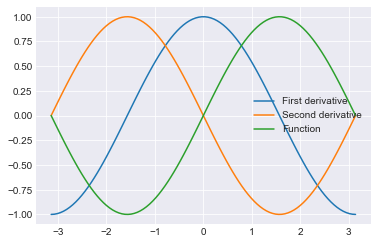

In [130]:
dom = np.linspace(-np.pi, np.pi, 100)

y_1 = np.zeros(100)
y_2 = np.zeros(100)

for i in range(100): #have to use loop as grad can't do array broadcast
    y_1[i] = d_taylor_sin(dom[i])

for i in range(100):
    y_2[i] = d_taylor_sin_2(dom[i])

plt.plot(dom, y_1, label = 'First derivative')
plt.plot(dom, y_2, label = 'Second derivative')
plt.plot(dom, np.sin(dom), label = 'Function')
plt.legend()
plt.show()

### Problem 8

In [131]:
def f_8(x): #define function
    output = np.array([[np.exp(x[0])*np.sin(x[1]) + x[1]**3], [3*x[1] - np.cos(x[0])]])
    return output

In [ ]:
#Use difference quotient approx from before

In [132]:
%%time
p_5(f_8, x_5, 1e-5)

Wall time: 4 ms


array([[[2.28735529, 4.46869394]],

       [[0.84147098, 3.        ]]])

In [147]:
#Use sympy
x, y = sy.symbols('x y')
fx = sy.exp(x) * sy.sin(y) + y**3
fy = 3*y - sy.cos(x)
f = sy.Matrix([fx, fy])

In [153]:
%%time
f_8_sym = f.jacobian((x, y))
f_8_lambda = sy.lambdify((x,y), f_8_sym, "numpy")
print(f_8_lambda(1,1))

[[2.28735529 4.46869394]
 [0.84147098 3.        ]]
Wall time: 7 ms


In [157]:
#Use autograd
from autograd import elementwise_grad
from autograd import jacobian

f = lambda x: anp.array([[anp.exp(x[0])*anp.sin(x[1]) + x[1]**3], [3*x[1] - anp.cos(x[0])]])

In [158]:
%%time
jacobian_f = jacobian(f)
print(jacobian_f(anp.array([1.0, 1.0])))

[[[2.28735529 4.46869394]]

 [[0.84147098 3.        ]]]
Wall time: 2 ms
